In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train[1].csv to train[1] (1).csv


In [ ]:
df = pd.read_csv('train[1].csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Handeling Missing Values 
Missing Data at Random

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Missing Data not at Random:Systematic Missing Values

In [ ]:
import numpy as np
df['cabin_null'] =np.where(df['Cabin'].isnull(),1,0) 

In [ ]:
##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

Missing At Random(MAR)

All the techniques of handeling missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent categories imputation

When should we apply?

Mean/ Median imputation has the assumption that the data are missing completely at random (MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables.

In [ ]:
df=pd.read_csv('train[1].csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
##Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df,variable,median):
  df[variable+'_median']=df[variable].fillna(median)

In [ ]:
median=df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

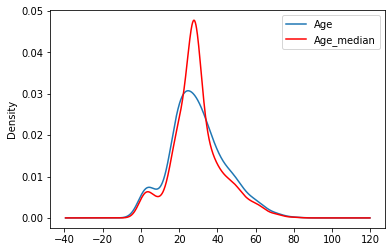

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Advantages and Disadvantages of Mean/ Median Imputation

Advantages

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

Disadvantages

1. Change and Distortion in the original variance
2. Impacts Correlation

### **Random Sample Imputation**

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

It assumes that the data are missing completely at random(MCAR)

In [27]:
df=pd.read_csv('train[1].csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [29]:
df['Age'].dropna().sample()

393    23.0
Name: Age, dtype: float64

In [35]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [31]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [37]:
def impute_nan(df, variable, median):
  df[variable+'_median']= df[variable].fillna(median)
  df[variable+'_random']= df[variable]
  ##It will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ##pandas need to have some index to order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable+'_random']=random_sample

In [39]:
median=df.Age.median()
median

28.0

In [40]:
impute_nan(df,'Age',median)

In [41]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


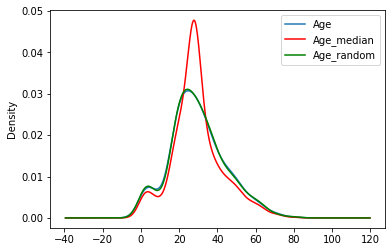

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##Advantages

1. Easy to implement
2. There is less distortion in variance

##Disadvantages

1. Every situation randomness wont work

##Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [44]:
df=pd.read_csv('train[1].csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [46]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [47]:
df.Age.median()

28.0

In [48]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [50]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages

1. Easy to implement
2. Captures the importance of missing values

## Disadvantages

1. Creating additional features(Curse of dimensionality)

## End of distribution imputation

In [51]:
df=pd.read_csv('train[1].csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


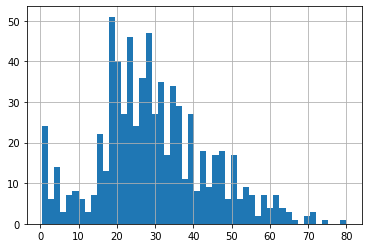

In [54]:
df.Age.hist(bins=50)

In [61]:
extreme=df.Age.mean()+3*df.Age.std()

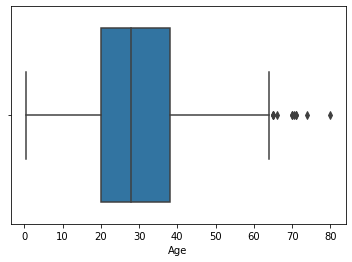

In [62]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [63]:
def impute_nan(df,variable,median,extreme):
  df[variable+'_end_distribution']=df[variable].fillna(extreme)
  df[variable].fillna(median,inplace=True)

In [64]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [66]:
df.head(20)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


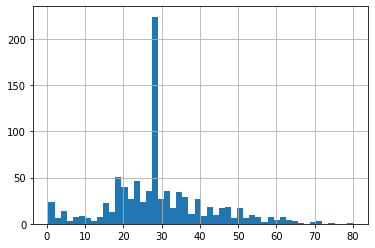

In [67]:
df['Age'].hist(bins=50)

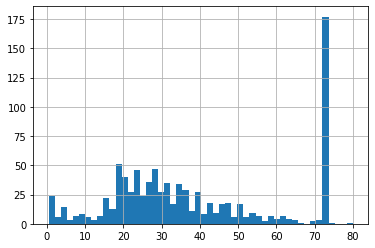

In [68]:
df['Age_end_distribution'].hist(bins=50)

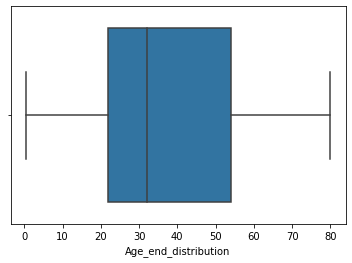

In [69]:
sns.boxplot('Age_end_distribution',data=df)

# Advantages

1. Easy to implement
2. Captures the importance of missing if there is one

# Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering.

# Arbitrary value imputation
It consists of replacing NAN by an arbitrary value.
This technique was derived from kaggle competition.
It should be more frequently present

# Advantages

1. Easy to implement
2. Captures the importance of missingess if there is one

# Disadvantages

1. Distorts the original distribution of the variable
2. If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution 
3. Hard to decide which value to use


In [76]:
df=pd.read_csv('train[1].csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [77]:
def impute_nan(df,variable):
  df[variable+'_zero']=df[variable].fillna(0)
  df[variable+'_hundred']=df[variable].fillna(100)

In [78]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
